In [1]:
from gbm import test_data_dir
from gbm.data import TTE
from gbm.binning.unbinned import bin_by_time
import matplotlib.pyplot as plt

/home/wlad98/gbm/lib/python3.8/site-packages/gbm/plot/lal_post_subs.py:184: UserWarning: Basemap not installed. Some functionality not available.
  warnings.warn('Basemap not installed. Some functionality not available.')


In [2]:
tte = TTE.open('glg_tte_n0_bn120624933_v00.fit')
# print the metadata in the PRIMARY header
tte.headers['PRIMARY']

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CREATOR = 'GBM_TTE_Reader.pl v2.19' / Software and version creating file        
FILETYPE= 'GBM PHOTON LIST'    / Name for this type of FITS file                
FILE-VER= '1.0.0   '           / Version of the format for this filetype        
TELESCOP= 'GLAST   '           / Name of mission/satellite                      
INSTRUME= 'GBM     '           / Specific instrument used for observation       
DETNAM  = 'NAI_00  '           / Individual detector name                       
OBSERVER= 'Meegan  '        

In [3]:
# bin to 1.024 s resolution, reference time is trigger time
phaii = tte.to_phaii(bin_by_time, 1.024, time_ref=0.0)
#%matplotlib inline

In [4]:
from gbm.plot import Lightcurve, Spectrum
erange = (50.0, 300.0)
time_split = (-20.0, 300.0)
lc_data = phaii.to_lightcurve(time_range=time_split,energy_range=erange)
#lcplot = Lightcurve(data=lc_data)

In [5]:
#BKG extimation
bkgd_times = [(-20.0, 5.0) , (21.0 , 300.0)]
# the background fitter interface
from gbm.background import BackgroundFitter
# our fitting algorithm
from gbm.background.binned import Polynomial
# we initialize our background fitter with the phaii object, the algorithm, and the time ranges to fit.
# if we were using an unbinned algorithm, we'd call .from_tte() and give it tte instead of phaii
backfitter = BackgroundFitter.from_phaii(phaii, Polynomial, time_ranges=bkgd_times)

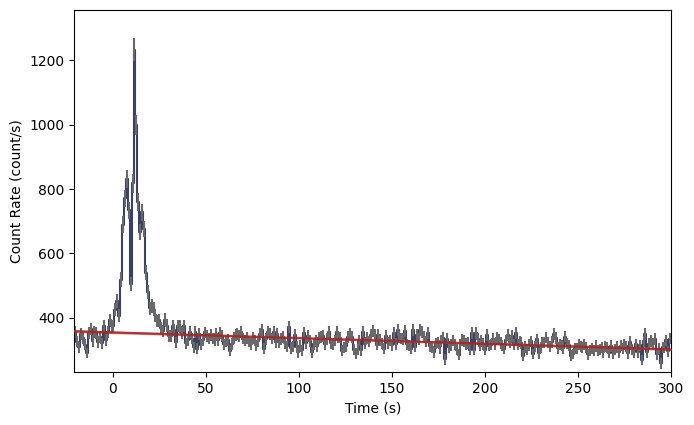

In [6]:
# and once initialized, we can run the fit with the fitting parameters appropriate for our algorithm.
# here, we'll do a 1st order polynomial
backfitter.fit(order=1)
#backfitter.statistic/backfitter.dof
bkgd = backfitter.interpolate_bins(phaii.data.tstart, phaii.data.tstop)
#type(bkgd)
lc_bkgd = bkgd.integrate_energy(*erange)
lcplot = Lightcurve(data=lc_data, background=lc_bkgd)
plt.show()